<a href="https://colab.research.google.com/github/ikeike616/AISYS_ChatBot/blob/main/AIsys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Google Driveとの連携(必須)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **必要なライブラリのインストール(必須)**

In [ ]:
!pip install pymlask

     |████████████████████████████████| 70 kB 3.6 MB/s 
  Created wheel for pymlask: filename=pymlask-0.3.2-py3-none-any.whl size=74906 sha256=400e563b54ce8bbe82eb011442211c450de3154c21f6d437a5b32b321cec869d
  Stored in directory: /root/.cache/pip/wheels/28/a8/2b/a4e4b83dc2ee2d492f49a8ad59325fff4d3540254a5a4ac560
Successfully built pymlask


In [ ]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-l

In [2]:
!pip3 install torch torchvision torchaudio

In [ ]:
from mlask import MLAsk
from collections import defaultdict
emotion_analyzer = MLAsk()
emotion_analyzer.analyze('こんな朝にはただただ世界が好きでたまらないという気がしない？')

ModuleNotFoundError: ignored

In [ ]:
{'activation': 'NEUTRAL',
 'emoticon': None,
 'emotion': defaultdict(list, {'suki': ['好き']}),
 'intensifier': {},
 'intension': 0,
 'orientation': 'POSITIVE',
 'representative': ('suki', ['好き']),
 'text': 'こんな朝にはただただ世界が好きでたまらないという気がしない？'}

{'activation': 'NEUTRAL',
 'emoticon': None,
 'emotion': defaultdict(list, {'suki': ['好き']}),
 'intensifier': {},
 'intension': 0,
 'orientation': 'POSITIVE',
 'representative': ('suki', ['好き']),
 'text': 'こんな朝にはただただ世界が好きでたまらないという気がしない？'}

In [ ]:
emotion_analyzer.analyze('ああ、生きているってありがたいこと。家へ帰るってうれしいものね')

{'activation': 'NEUTRAL',
 'emoticon': None,
 'emotion': defaultdict(list, {'yorokobi': ['ありがたい', 'うれしい']}),
 'intensifier': {'interjections': ['ああ']},
 'intension': 1,
 'orientation': 'POSITIVE',
 'representative': ('yorokobi', ['ありがたい', 'うれしい']),
 'text': 'ああ、生きているってありがたいこと。家へ帰るってうれしいものね'}

In [ ]:
emotion_analyzer.analyze('あんたなんか大嫌いだわ！あんたみたいに下品で、失礼で、心無しの人、見たこともないわ！')

{'activation': 'NEUTRAL',
 'emoticon': None,
 'emotion': defaultdict(list, {'iya': ['下品', '大嫌い']}),
 'intensifier': {'exclamation': ['！'], 'interjections': ['なんか']},
 'intension': 2,
 'orientation': 'NEGATIVE',
 'representative': ('iya', ['下品', '大嫌い']),
 'text': 'あんたなんか大嫌いだわ！あんたみたいに下品で、失礼で、心無しの人、見たこともないわ！'}

In [ ]:
emotion_analyzer.analyze('私は、パンです！')

{'emotion': None, 'text': '私は、パンです！'}

## 課題7の再現　


## 学習用データの作成
コードはch06内のコードを流用。

In [5]:
texts=[]
filename='/content/drive/MyDrive/Colab Notebooks/AISYS/generatetext/aozora-tiny-wakachiL.txt'
modelname='/content/drive/MyDrive/Colab Notebooks/AISYS/generatetext/models/myRnnlm-tiny.pkl'
with open(filename, encoding="utf-8") as f:
    i=0
    j=0
    for line in f:
        if(filename.endswith('csv')):
            line = line.replace('"', '') 	# 「”」を削除
            line = line.replace('　', '') 	# 「全角スペース」を削除
            line = line.replace(',,', ',') 	# 削除の結果、空になる部分を削除
        texts.append(line.split(",")[:-1])
        i=i+1
        j=j+len(line.split(",")[:-1])
        if(i%100000==1):
            print(i,texts[-1])

print(i,"lines",j,"words loaded")

import numpy as np
def text_to_id(texts):
    word_to_id = {}
    id_to_word = {}
    allwords=[]
    for words in texts:
        allwords.extend(words)
        for word in words:
            if word not in word_to_id:
                new_id = len(word_to_id)
                word_to_id[word] = new_id
                id_to_word[new_id] = word
    corpus = np.array([word_to_id[w] for w in allwords])
    return corpus, word_to_id, id_to_word

print(texts[:5])
corpus, word_to_id, id_to_word = text_to_id(texts)
corpus, corpus_test = np.split(corpus, [int(len(corpus)*0.9)])
print(len(word_to_id),"kind of words in the corpus,", len(corpus),"words",len(corpus),"in train",len(corpus_test),"in test")

1 ['銭形', '平次', '捕物', '控']
39550 lines 1001408 words loaded
[['銭形', '平次', '捕物', '控'], ['金色', 'の', '処女'], ['野村', '胡堂'], ['これ', 'は', '銭形', '平次', 'の', '最初', 'の', '手柄', '話', 'だ', '、', 'この', '事件', 'が', '平次', 'を', '有名', 'だ', 'する', 'た', 'の', 'です', '。'], ['この', '頃', 'お静', 'は', 'まだ', '平次', 'の', '女房', 'に', 'なる', 'て', 'いる', 'ず', '、', 'ガラッ', '八', 'も', '現われる', 'て', 'は', 'おる', 'ます', 'ぬ', '。']]
38470 kind of words in the corpus, 901267 words 901267 in train 100141 in test


['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/Colab Notebooks/AISYS/generatetext',
 '..',
 '..',
 '..',
 '..',
 '/content/drive/MyDrive/Colab Notebooks/AISYS/generatetext',
 '..',
 '..',
 '/content/drive/MyDrive/Colab Notebooks/AISYS/generatetext',
 '/content/drive/MyDrive/Colab Notebooks/AISYS/generatetext']
vocab_size= 38470 wordvec_size= 100
| epoch 1 |  iter 1 / 1287 | time 0[s] | perplexity 38468.68
| epoch 1 |  iter 21 / 1287 | time 13[s] | perplexity 5362.85
| epoch 1 |  iter 41 / 1287 | time 26[s] | perplexity 1367.17
| epoch 1 |  iter 61 / 1287 | time 40[s] | perplexity 944.24
| epoch 1 |  iter 81 / 1287 | time 53[s] | perplexity 704.06
| epoch 1 |  iter 101 / 1287 | time 66[s] | perplexity 617.45
| epoch 1 |  iter 121 / 1287

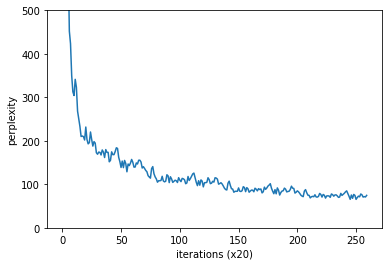

evaluating perplexity ...
285 / 286
test perplexity:  148.03498384377355


In [6]:
import sys
import pprint
sys.path.append('/content/drive/MyDrive/Colab Notebooks/AISYS/generatetext')
pprint.pprint(sys.path)

from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb
from LIB.rnnlm import Rnnlm

# ハイパーパラメータの設定
batch_size = 20
wordvec_size = 100
hidden_size = 100  # RNNの隠れ状態ベクトルの要素数
time_size = 35  # RNNを展開するサイズ
lr = 20.0
max_epoch = 4
max_grad = 0.25

# 学習データの読み込み
vocab_size = len(word_to_id)
print("vocab_size=",vocab_size,"wordvec_size=",wordvec_size)
xs = corpus[:-1]
ts = corpus[1:]

# モデルの生成
model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

# 勾配クリッピングを適用して学習
trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad,
            eval_interval=20)
trainer.plot(ylim=(0, 500))

# テストデータで評価
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('test perplexity: ', ppl_test)

# パラメータの保存
model.save_params(modelname)


## 文章生成
コードはch07から流用

In [9]:
texts=[]
# filename='../aozora-tiny-wakachiL.txt'
# modelname='../models/myRnnlm-tiny.pkl'
filename='/content/drive/MyDrive/Colab Notebooks/AISYS/generatetext/aozora-tiny-wakachiL.txt'
modelname='/content/drive/MyDrive/Colab Notebooks/AISYS/generatetext/models/myRnnlm-tiny.pkl'
with open(filename, encoding="utf-8") as f:
    i=0
    j=0
    for line in f:
        if(filename.endswith('csv')):
            line = line.replace('"', '') 	# 「”」を削除
            line = line.replace('　', '') 	# 「全角スペース」を削除
            line = line.replace(',,', ',') 	# 削除の結果、空になる部分を削除

        texts.append(line.split(",")[:-1])
        i=i+1
        j=j+len(line.split(",")[:-1])
        if(i%100000==1):
            print(i,texts[-1])

print(i,"lines",j,"words loaded")

1 ['銭形', '平次', '捕物', '控']
39550 lines 1001408 words loaded


In [10]:
import numpy as np
def text_to_id(texts):
    word_to_id = {}
    id_to_word = {}
    allwords=[]
    for words in texts:
        allwords.extend(words)
        for word in words:
            if word not in word_to_id:
                new_id = len(word_to_id)
                word_to_id[word] = new_id
                id_to_word[new_id] = word
    corpus = np.array([word_to_id[w] for w in allwords])
    return corpus, word_to_id, id_to_word

print(texts[:5])
corpus, word_to_id, id_to_word = text_to_id(texts)
corpus, corpus_test = np.split(corpus, [int(len(corpus)*0.9)])
print(len(word_to_id),"kind of words in the corpus,", len(corpus),"words",len(corpus),"in train",len(corpus_test),"in test")

[['銭形', '平次', '捕物', '控'], ['金色', 'の', '処女'], ['野村', '胡堂'], ['これ', 'は', '銭形', '平次', 'の', '最初', 'の', '手柄', '話', 'だ', '、', 'この', '事件', 'が', '平次', 'を', '有名', 'だ', 'する', 'た', 'の', 'です', '。'], ['この', '頃', 'お静', 'は', 'まだ', '平次', 'の', '女房', 'に', 'なる', 'て', 'いる', 'ず', '、', 'ガラッ', '八', 'も', '現われる', 'て', 'は', 'おる', 'ます', 'ぬ', '。']]
38470 kind of words in the corpus, 901267 words 901267 in train 100141 in test


In [12]:
# coding: utf-8
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/AISYS/generatetext')
from LIB.rnnlm_gen import RnnlmGen
from dataset import ptb


#corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)
print(vocab_size,corpus_size)

model = RnnlmGen(vocab_size=vocab_size, wordvec_size=100, hidden_size=100)
model.load_params(modelname)

# start文字とskip文字の設定
#前のカラムで生成したキーワードから指定する。
start_word = '平次'
start_id = word_to_id[start_word]
#skip_words = ['N', '<unk>', '$']
skip_words = ["　"]
skip_ids = [word_to_id[w] for w in skip_words]
# 文章生成
word_ids = model.generate(start_id, skip_ids)
txt = '/'.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

38470 901267
平次/の/其方/を/見る/すべて/マゴコロ/』/と/いう/づけ/深い/二人/、/気/が/付く/た/事/も/わかる/ない/。/一昨/通り/、/二十三/日/を/始め/に/載せる/ながら/、/二人/の/口/から/やれる/と/、/「/大丈夫/です/ね/」/「/どう/する/た/ぞ/」/「/坊や/に/シェラン/咨嘆/が/ない/が/柳原/だ/する/て/、/ねじあげる/られる/た/よう/だ/思う/られる/ん/だ/。/どう/か/な/そう/だ/の/ね/な/」/と/見上げる/た/。/その/妙/だ/指導者/を/、/一人/と/小幡/の/悔悟/や


#                ↓↓↓↓↓↓↓↓↓↓↓↓↓**共感チャットボットの作成**↓↓↓↓↓↓↓↓↓↓↓↓↓↓


## チャットボット用ライブラリのインポート

In [1]:
import numpy as np
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/AISYS/generatetext')
from LIB.rnnlm_gen import RnnlmGen
from dataset import ptb

## チャットボット用の関数定義

### 関数一覧
・入力内容をファイルに保存する関数(InputToFile)\
・ファイルの内容を学習させる関数(LearningText)\
・学習内容をもとに文章生成する関数(CreateText)

In [5]:
def text_to_id(texts):
    word_to_id = {}
    id_to_word = {}
    allwords=[]
    for words in texts:
        allwords.extend(words)
        for word in words:
            if word not in word_to_id:
                new_id = len(word_to_id)
                word_to_id[word] = new_id
                id_to_word[new_id] = word
    corpus = np.array([word_to_id[w] for w in allwords])
    return corpus, word_to_id, id_to_word

In [3]:
def CreateText():
  #LIBのimport
  # import numpy as np
  # import sys
  # sys.path.append('/content/drive/MyDrive/Colab Notebooks/AISYS/generatetext')
  # from LIB.rnnlm_gen import RnnlmGen
  # from dataset import ptb
  texts=[]
  filename='/content/drive/MyDrive/Colab Notebooks/AISYS/generatetext/aozora-tiny-wakachiL.txt'
  modelname='/content/drive/MyDrive/Colab Notebooks/AISYS/generatetext/models/myRnnlm-tiny.pkl'
  #文章生成　1/3セルの内容
  with open(filename, encoding="utf-8") as f:
      i=0
      j=0
      for line in f:
          if(filename.endswith('csv')):
            line = line.replace('"', '') 	# 「”」を削除
            line = line.replace('　', '') 	# 「全角スペース」を削除
            line = line.replace('”','')
            line = line.replace(' ','')
            line = line.replace('…','')
            line = line.replace('「','')
            line = line.replace('」','')
            line = line.replace('』','')
            line = line.replace('『','')
            line = line.replace('（','')
            line = line.replace('）','')
            line = line.replace('／','')
            line = line.replace('》','')
            line = line.replace('《','')
            line = line.replace(',,', ',') 	# 削除の結果、空になる部分を削除
          texts.append(line.split(",")[:-1])
          i=i+1
          j=j+len(line.split(",")[:-1])
          if(i%100000==1):
            print(i,texts[-1])
  #print(i,"lines",j,"words loaded")
  #文章生成　2/3セルの内容
  # def text_to_id(texts):
  #   word_to_id = {}
  #   id_to_word = {}
  #   allwords=[]
  #   for words in texts:
  #       allwords.extend(words)
  #       for word in words:
  #           if word not in word_to_id:
  #               new_id = len(word_to_id)
  #               word_to_id[word] = new_id
  #               id_to_word[new_id] = word
  #   corpus = np.array([word_to_id[w] for w in allwords])
  #   return corpus, word_to_id, id_to_word

  #print(texts[:5])
  corpus, word_to_id, id_to_word = text_to_id(texts)
  corpus, corpus_test = np.split(corpus, [int(len(corpus)*0.9)])
  #print(len(word_to_id),"kind of words in the corpus,", len(corpus),"words",len(corpus),"in train",len(corpus_test),"in test")
  #文章生成　3/3セルの内容
  #corpus, word_to_id, id_to_word = ptb.load_data('train')
  vocab_size = len(word_to_id)
  corpus_size = len(corpus)
  #print(vocab_size,corpus_size)

  model = RnnlmGen(vocab_size=vocab_size, wordvec_size=100, hidden_size=100)
  model.load_params(modelname)

  # start文字とskip文字の設定
  #前のカラムで生成したキーワードから指定する。
  start_word = '平次'
  start_id = word_to_id[start_word]
  #skip_words = ['N', '<unk>', '$']
  skip_words = ["　"]
  skip_ids = [word_to_id[w] for w in skip_words]
  # 文章生成
  word_ids = model.generate(start_id, skip_ids)
  txt = '/'.join([id_to_word[i] for i in word_ids])
  txt = txt.replace(' <eos>', '.\n')
  print(txt)
  return txt

In [ ]:
def LearningText():
  # import numpy as np
  texts=[]
  filename='/content/drive/MyDrive/Colab Notebooks/AISYS/generatetext/aozora-tiny-wakachiL.txt'
  modelname='/content/drive/MyDrive/Colab Notebooks/AISYS/generatetext/models/myRnnlm-tiny.pkl'
  with open(filename, encoding="utf-8") as f:
    i=0
    j=0
    for line in f:
        if(filename.endswith('csv')):
            line = line.replace('"', '') 	# 「”」を削除
            line = line.replace('　', '') 	# 「全角スペース」を削除
            line = line.replace(',,', ',') 	# 削除の結果、空になる部分を削除
        texts.append(line.split(",")[:-1])
        i=i+1
        j=j+len(line.split(",")[:-1])
        if(i%100000==1):
            print(i,texts[-1])

  print(i,"lines",j,"words loaded")

  


  print(texts[:5])
  corpus, word_to_id, id_to_word = text_to_id(texts)
  corpus, corpus_test = np.split(corpus, [int(len(corpus)*0.9)])
  print(len(word_to_id),"kind of words in the corpus,", len(corpus),"words",len(corpus),"in train",len(corpus_test),"in test")

In [4]:
CreateText()

1 ['銭形', '平次', '捕物', '控']


ValueError: ignored